<a href="https://colab.research.google.com/github/fourthqua/cloud/blob/main/pytorchgnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

     |████████████████████████████████| 106 kB 5.1 MB/s 
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
     |████████████████████████████████| 280 kB 5.1 MB/s 


In [12]:
!pip install -q world_trade_data

In [3]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [4]:
embeddings = torch.rand((100, 16), dtype=torch.float)

In [5]:
rows = np.random.choice(100, 500)
cols = np.random.choice(100, 500)
edges = torch.tensor([rows, cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
edges_attr = np.random.choice(3,500)

In [7]:
ys = torch.rand((100)).round().long()

In [8]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

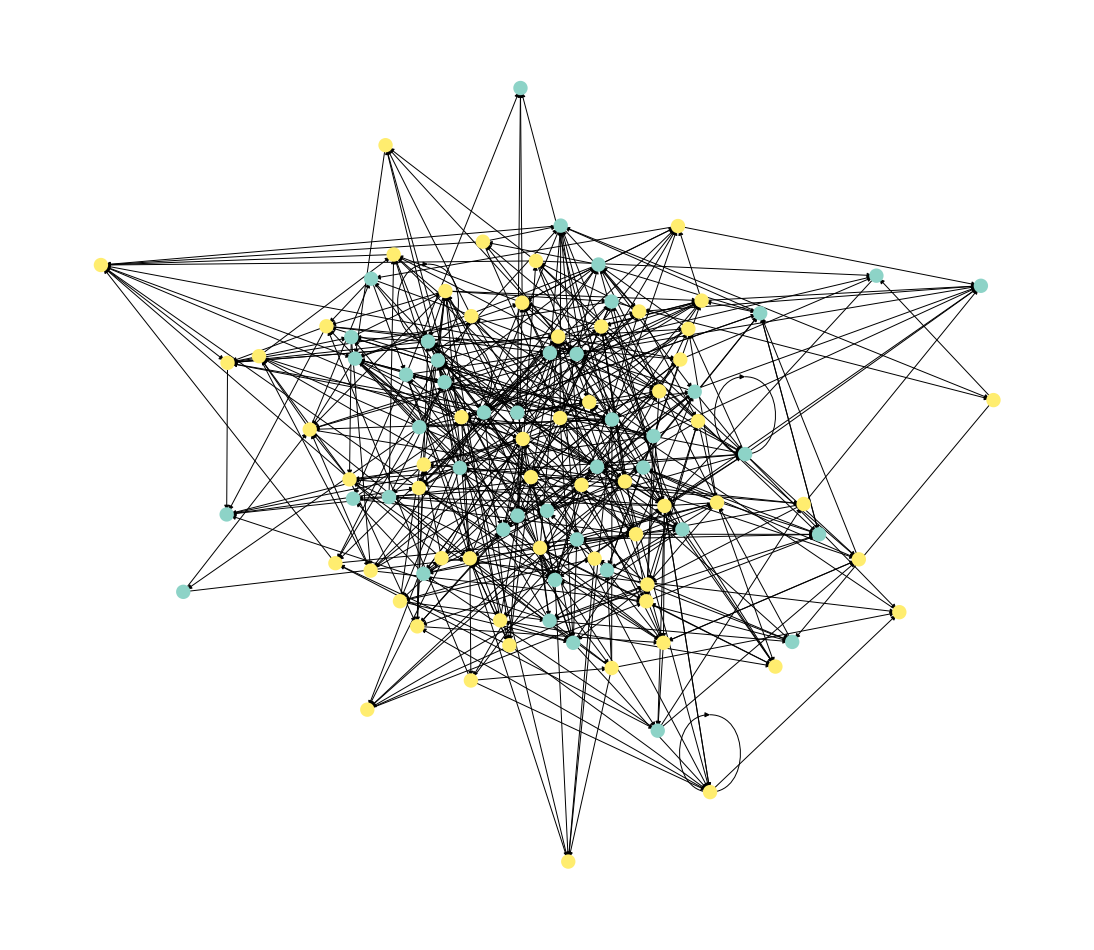

In [10]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

In [70]:
import pandas as pd
import world_trade_data as wits
import scipy
countries = wits.get_countries() # gets all the countries/regions and others
regions = countries.loc[countries['isgroup'] == 'Yes'] #filtering out the regions 
#countries = countries.loc[countries['isgroup'] == 'No'].reset_index() #filtering out the countries
data_f = pd.read_csv('/content/All_years_imports_all_combined.csv')
data_f = data_f.loc[data_f['ProductCode'] == 'All Products'] #All products only ####change for analysis



#countries['name'].to_csv("C:/data/labels_countries.csv")





In [71]:
data_f = data_f.loc[data_f['Year'] == 2013.0]

In [76]:
pd.set_option('display.max_rows', None)
countries=countries.reset_index()
print(regions)

                                name notes countrycode  isreporter  ispartner  \
iso3Code                                                                        
EAS              East Asia & Pacific               EAS       False      False   
ECS            Europe & Central Asia               ECS       False      False   
LCN        Latin America & Caribbean               LCN       False      False   
MEA       Middle East & North Africa               MEA       False      False   
NAC                    North America               NAC       False      False   
SAS                       South Asia               SAS       False      False   
SSF               Sub-Saharan Africa               SSF       False      False   
WLD                            World               000       False      False   

         isgroup grouptype  
iso3Code                    
EAS          Yes    Region  
ECS          Yes    Region  
LCN          Yes    Region  
MEA          Yes    Region  
NAC          Ye

In [73]:
def replace_values_key(labels_country, data_f,key_column):
    # replaces the country names with numbers
    for i in range(len(labels_country[key_column])):
        data_f = data_f.replace([labels_country[key_column].loc[i]], i)
    return data_f
data_f = data_f.replace('Swaziland', 'Eswatini')
data_f = replace_values_key(countries, data_f,'name')

In [75]:
pd.set_option('display.max_rows', 100)
print(data_f)

         Unnamed: 0    Freq Reporter                  Partner   ProductCode  \
8288113          13  Annual        0                       48  All Products   
8288125          25  Annual        0                       94  All Products   
8288141          41  Annual        0    East Asia and Pacific  All Products   
8288155          55  Annual        0  Europe and Central Asia  All Products   
8288162          62  Annual        0                      248  All Products   
...             ...     ...      ...                      ...           ...   
8799297      511197  Annual      265                      260  All Products   
8799304      511204  Annual      265                      258  All Products   
8799328      511228  Annual      265                      216  All Products   
8799345      511245  Annual      265                       53  All Products   
8799374      511274  Annual      265                      264  All Products   

                                 Indicator  Year   

In [68]:
rows = data_f['Reporter'].to_numpy().astype("float32")
cols = data_f['Partner'].to_numpy().astype("float32")


ValueError: ignored

In [46]:
edges = torch.tensor([rows, cols])
print(edges)

TypeError: ignored